**Notebook by [Daniel Fojo](https://www.linkedin.com/in/daniel-fojo/)**

# Linear Regression with Keras

## Necessary imports
Tested for Keras version 2.2.4

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import keras
keras.__version__

'2.2.4'

## Data loading
We will try to predict new values for $x$ given the following pairs of values. If our regressor works properly it should learn approximately $W=5$, $b=3$.

In [0]:
# Training Data
train_X = np.random.randn(20)
train_Y = 5*train_X + 3 + np.random.randn(20)/3
n_samples = train_X.shape[0]
print("X: ", train_X, "\nY: ", train_Y)

X:  [-7.39923527e-01 -2.53262859e-01  4.24420914e-01 -1.07507687e+00
  2.46832829e-03  6.42120309e-02 -7.63857870e-01 -3.55324124e-01
  3.78356482e-01  1.25720045e+00 -1.00239445e-01 -2.59947107e-01
  1.11878953e+00  5.22433064e-01 -3.19617862e+00 -9.32510347e-01
  7.91876023e-01  5.85533814e-01  6.86730642e-01  5.23765756e-01] 
Y:  [ -0.26910381   1.92460949   4.9266772   -1.97539494   2.69994042
   3.18547687  -0.74931275   1.44075359   4.97087914   9.16817099
   2.54882318   1.28961525   8.21604682   6.09486284 -12.86113958
  -1.68578002   6.93968735   6.01392514   6.53818162   5.56171724]


## Defining the model
For this lab we will use the sequential API that we covered in class, as our model is really simple.

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(1, activation=None, input_shape=(1,)))

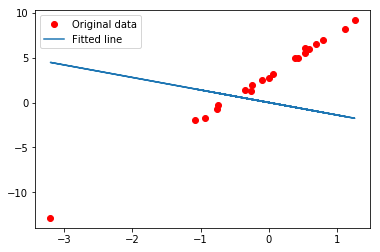

In [0]:
# Graphic display *before* training
W, b = [np.asscalar(v) for v in model.layers[0].get_weights()]
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, W * train_X + b, label='Fitted line')
plt.legend()
plt.show()

## Compiling the model

In [0]:
model.compile(optimizer=keras.optimizers.SGD(lr=0.1), 
              loss='mean_squared_error')

In [0]:
model.fit(train_X, train_Y, epochs=100, batch_size=1)

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 7.9223
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7638
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1299
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0682
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0752
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0679
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1007
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0605
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0680
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0601
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0977
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0777
Epoch 13/100
20/20 [=================

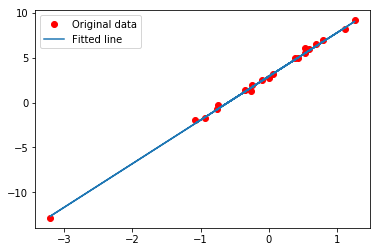

In [0]:
# Graphic display *after* training
W, b = [np.asscalar(v) for v in model.layers[0].get_weights()]
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, W * train_X + b, label='Fitted line')
plt.legend()
plt.show()

## Exercise 1:
What is the predicted value for $x=0.5$?

In [0]:
model.predict([0.5])

array([[5.3528347]], dtype=float32)

In [0]:
model.predict([0.5,1,4])

array([[ 5.3528347],
       [ 7.7895865],
       [22.410097 ]], dtype=float32)

## Exercise 2: Next steps

Keras provides a [dataset](https://keras.io/datasets/#boston-housing-price-regression-dataset) with house attributes and pricing in Boston in the 1970s. Can you train a model that predicts the price of a house it has never seen given its attributes?

Note: unlike in this simple example, you will be working with two data splits (train and test). Remember that the test data is only used for evaluation, as it can give us a measure of how good the model is when making predictions for data it has never seen.

Tip: machine learning models usually work better when all inputs have a similar range. Try to normalize the data that is fed to the model by subtracting the mean and dividing by the standard deviation for each input dimension.